In [8]:
import pandas as pd

data_path = 'data/output/listings.csv'
df = pd.read_csv(data_path)

df.head()

,id,_ptype,_ltype,price,kabkoId,bedRooms,bathRooms,landSize,buildingSize,garages,sold
0,1.732279e+11,apartment,sale,9.120978e+08,618.0,1.0,1.0,0.0,NaN,0.0,no
1,1.277775e+11,house,rent,3.084582e+07,NaN,5.0,5.0,150.0,174.0,0.0,no
2,1.642203e+11,apartment,sale,9.806484e+08,608.0,3.0,2.0,0.0,51.0,0.0,NaN
3,9.846768e+10,apartment,sale,2.403327e+08,618.0,NaN,1.0,0.0,16.0,0.0,no
4,3.503346e+10,NaN,sale,1.200992e+09,618.0,3.0,2.0,136.0,93.0,0.0,no


In [9]:
df.describe()

,id,price,kabkoId,bedRooms,bathRooms,landSize,buildingSize,garages
count,9.570000e+02,9.580000e+02,953.000000,948.000000,945.000000,954.000000,937.000000,954.000000
mean,1.095421e+12,1.730305e+09,615.030430,3.003165,2.441270,129.540881,136.655283,0.293501
std,3.254151e+12,2.261554e+09,4.571573,1.144746,1.328067,764.261154,421.193430,0.639566
min,1.773512e+10,2.855190e+05,608.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,6.581172e+10,4.806956e+08,608.000000,2.000000,2.000000,45.000000,42.000000,0.000000
50%,1.068585e+11,1.025795e+09,618.000000,3.000000,2.000000,84.000000,75.000000,0.000000
75%,1.506071e+11,1.978735e+09,618.000000,4.000000,3.000000,143.500000,150.000000,0.000000
max,1.758122e+13,2.370212e+10,618.000000,9.000000,12.000000,23514.000000,8190.000000,4.000000


In [10]:
statistical_description = {
    'Property Type Mode : ': df['_ptype'].mode()[0],
    'Listing Type Mode : ': df['_ltype'].mode()[0],
    'Bedrooms Stats :\n': df['bedRooms'].describe(),
    'Bathrooms Stats :\n': df['bathRooms'].describe(),
    'Land Size Stats :\n': df['landSize'].describe(),
    'Building Size Stats :\n': df['buildingSize'].describe(),
    'Garages Stats :\n': df['garages'].describe(),
    'Sold Mode : ': df['sold'].mode()[0]
}

print("Statistical Description:")
for key, value in statistical_description.items():
    print("\n")
    print(f"{key}{value}")

Statistical Description:


Property Type Mode : house


Listing Type Mode : sale


Bedrooms Stats :
count    948.000000
mean       3.003165
std        1.144746
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: bedRooms, dtype: float64


Bathrooms Stats :
count    945.000000
mean       2.441270
std        1.328067
min       -1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: bathRooms, dtype: float64


Land Size Stats :
count      954.000000
mean       129.540881
std        764.261154
min          0.000000
25%         45.000000
50%         84.000000
75%        143.500000
max      23514.000000
Name: landSize, dtype: float64


Building Size Stats :
count     937.000000
mean      136.655283
std       421.193430
min         0.000000
25%        42.000000
50%        75.000000
75%       150.000000
max      8190.000000
Name: buildingSize, dtype: float64


Garages Stats :
count    954.000000
mean 

In [11]:
duplicates = df.duplicated().sum()

null_counts = df.isnull().sum()

weird_values = {}
columns_to_check = df.columns.tolist()

for column in columns_to_check:
    if pd.api.types.is_numeric_dtype(df[column]):
        weird_values[column] = df[column][df[column] < 0].count()

null_percentage = (null_counts / len(df)) * 100

print(f"Jumlah duplikat: {duplicates}")
print("Jumlah nilai null per kolom:")
print(null_counts)
print("Nilai aneh per kolom:")
print(weird_values)
print("Persentase nilai null per kolom:")
print(null_percentage)

df_cleaned = df.drop_duplicates()

for column in columns_to_check:
    if pd.api.types.is_numeric_dtype(df_cleaned[column]):
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)
    else:
        mode_value = df_cleaned[column].mode()[0]
        df_cleaned[column].fillna(mode_value, inplace=True)

print("Jumlah nilai null setelah imputasi:")
print(df_cleaned.isnull().sum())

for column in columns_to_check:
    if pd.api.types.is_numeric_dtype(df_cleaned[column]):
        df_cleaned = df_cleaned[df_cleaned[column] >= 0]

print("Jumlah nilai null setelah pembersihan:")
print(df_cleaned.isnull().sum())

print("Data setelah pembersihan:")
print(df_cleaned.info())

Jumlah duplikat: 0
Jumlah nilai null per kolom:
id               43
_ptype           53
_ltype           49
price            42
kabkoId          47
bedRooms         52
bathRooms        55
landSize         46
buildingSize     63
garages          46
sold            146
dtype: int64
Nilai aneh per kolom:
{'id': 0, 'price': 0, 'kabkoId': 0, 'bedRooms': 0, 'bathRooms': 3, 'landSize': 0, 'buildingSize': 0, 'garages': 0}
Persentase nilai null per kolom:
id               4.3
_ptype           5.3
_ltype           4.9
price            4.2
kabkoId          4.7
bedRooms         5.2
bathRooms        5.5
landSize         4.6
buildingSize     6.3
garages          4.6
sold            14.6
dtype: float64
Jumlah nilai null setelah imputasi:
id              0
_ptype          0
_ltype          0
price           0
kabkoId         0
bedRooms        0
bathRooms       0
landSize        0
buildingSize    0
garages         0
sold            0
dtype: int64
Jumlah nilai null setelah pembersihan:
id              0

/var/folders/23/bmjvhqhs0hvcc6cfw9_sgrkw0000gn/T/ipykernel_73681/1103139455.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)
/var/folders/23/bmjvhqhs0hvcc6cfw9_sgrkw0000gn/T/ipykernel_73681/1103139455.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [12]:
df_cleaned.to_csv('cleaned_listings.csv', index=False)

print("Data yang telah dibersihkan telah disimpan ke 'data/cleaned_listings.csv")

Data yang telah dibersihkan telah disimpan ke 'data/cleaned_listings.csv


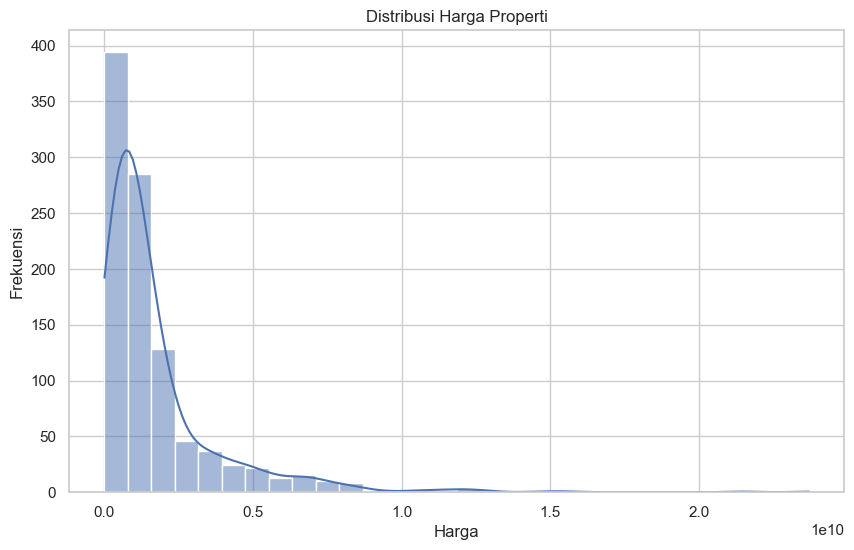

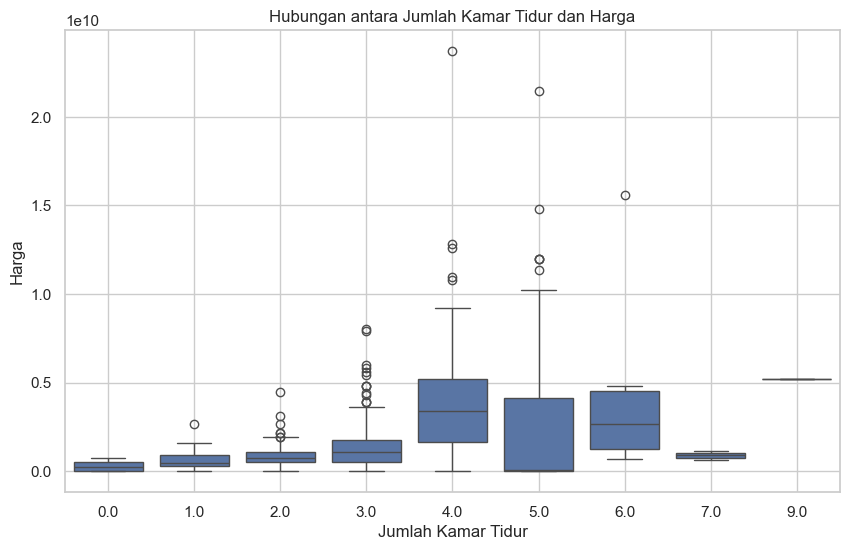

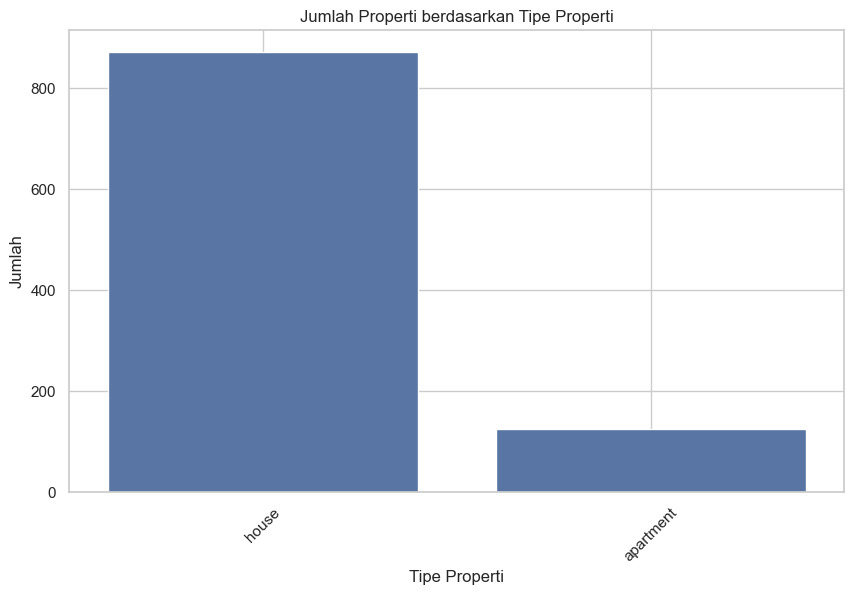

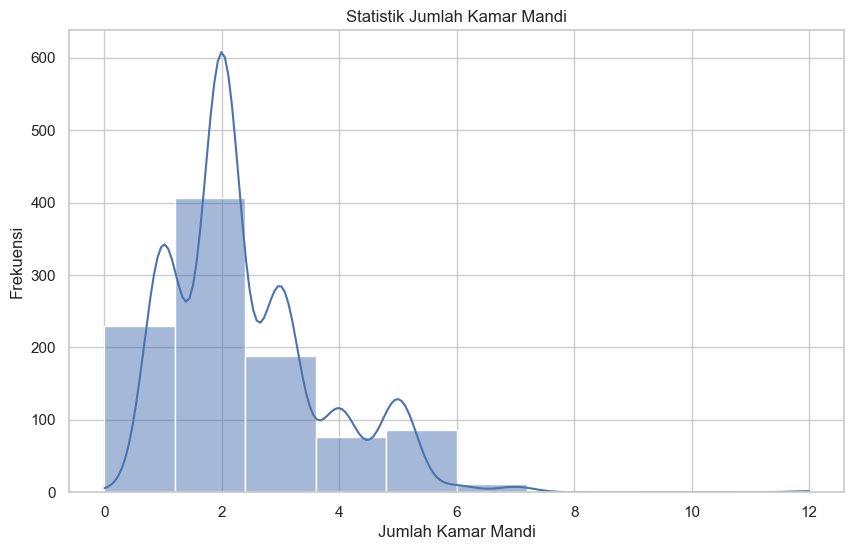

/var/folders/23/bmjvhqhs0hvcc6cfw9_sgrkw0000gn/T/ipykernel_73681/87381204.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Count', data=listing_counts, palette='viridis')


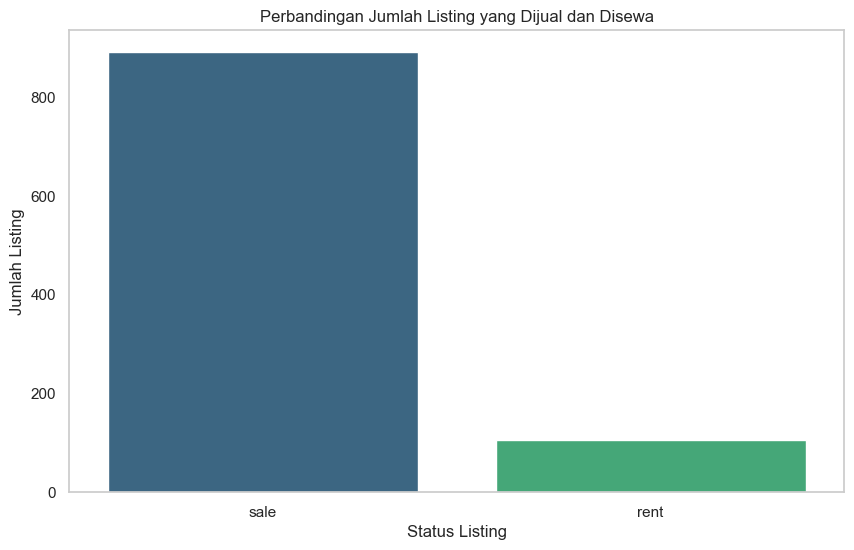

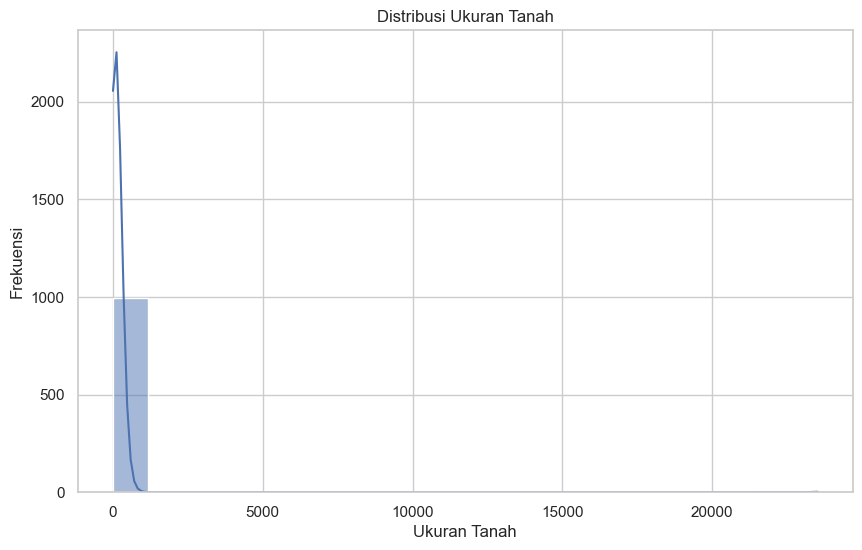

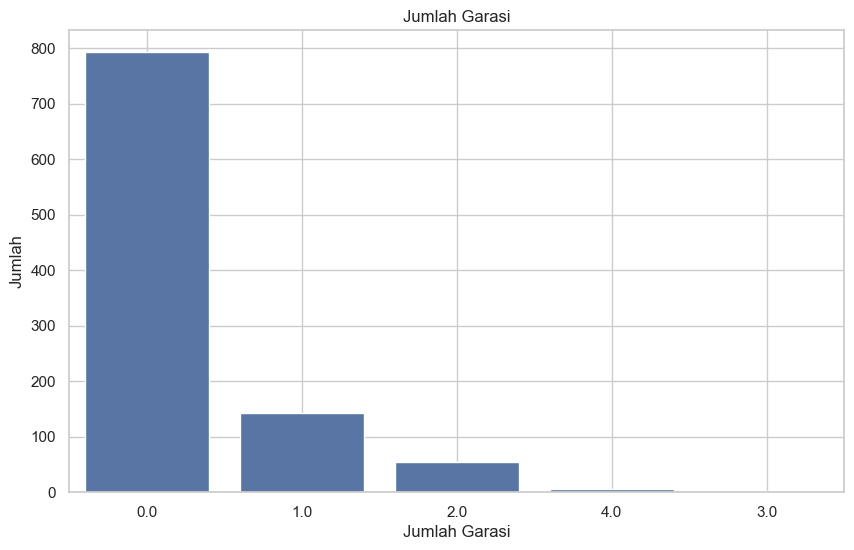

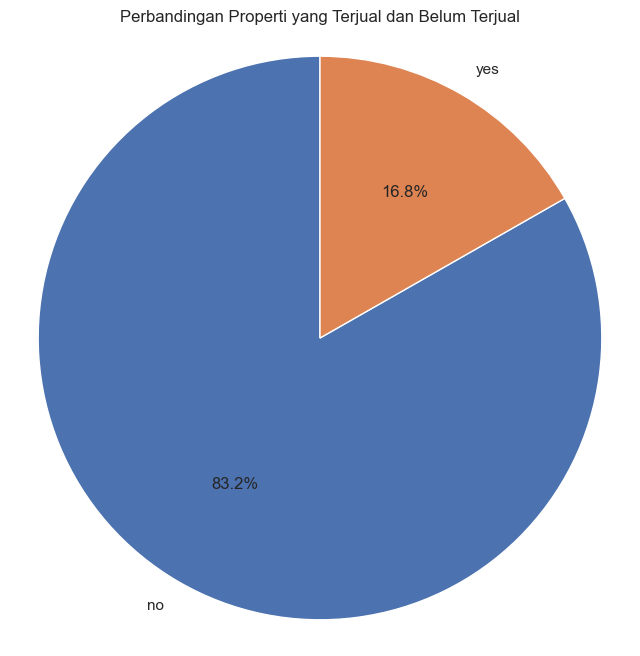

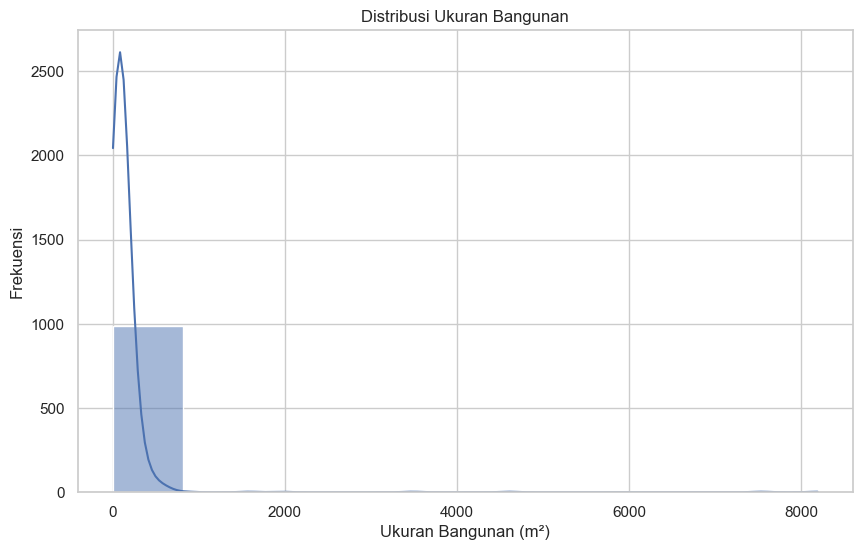

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

cleaned_data_path = 'cleaned_listings.csv'
df_cleaned = pd.read_csv(cleaned_data_path)

folder_path = 'photo_visualisasi'
os.makedirs(folder_path, exist_ok=True)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True)
plt.title('Distribusi Harga Properti')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'distribution_price.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedRooms', y='price', data=df_cleaned)
plt.title('Hubungan antara Jumlah Kamar Tidur dan Harga')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'bedrooms_vs_price.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='_ptype', data=df_cleaned, order=df_cleaned['_ptype'].value_counts().index)
plt.title('Jumlah Properti berdasarkan Tipe Properti')
plt.xlabel('Tipe Properti')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'property_type_count.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['bathRooms'], bins=10, kde=True)
plt.title('Statistik Jumlah Kamar Mandi')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'bathrooms_statistics.png'))
plt.show()

listing_counts = df_cleaned['_ltype'].value_counts()
listing_counts = listing_counts.reset_index()
listing_counts.columns = ['Status', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Count', data=listing_counts, palette='viridis')
plt.title('Perbandingan Jumlah Listing yang Dijual dan Disewa')
plt.xlabel('Status Listing')
plt.ylabel('Jumlah Listing')
plt.grid(axis='y')
plt.savefig(os.path.join(folder_path, 'listing_comparison.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['landSize'], bins=20, kde=True)
plt.title('Distribusi Ukuran Tanah')
plt.xlabel('Ukuran Tanah')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'land_size_distribution.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='garages', data=df_cleaned, order=df_cleaned['garages'].value_counts().index)
plt.title('Jumlah Garasi')
plt.xlabel('Jumlah Garasi')
plt.ylabel('Jumlah')
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'garage_count.png'))
plt.show()

plt.figure(figsize=(8, 8))
sold_counts = df_cleaned['sold'].value_counts()
plt.pie(sold_counts, labels=sold_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Properti yang Terjual dan Belum Terjual')
plt.axis('equal')
plt.savefig(os.path.join(folder_path, 'sold_vs_unsold_pie_chart.png')) 
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['buildingSize'], bins=10, kde=True)
plt.title('Distribusi Ukuran Bangunan')
plt.xlabel('Ukuran Bangunan (m²)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'building_size_distribution.png'))  # Simpan gambar
plt.show()



# link google slide
https://docs.google.com/presentation/d/1yJh1wgiRH0JMwTUBPMcFZKHyuoNMWh2nz7qZTdrE4e8/edit?usp=sharing